## **Jobsheet 7: Clustering**

### **Praktikum 1 - KMeans**

In [22]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('datasets/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


import library dan load dataset iris.csv menggunakan pandas

In [23]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

memilih kolom dengan index 1 hingga sebelum kolom terakhir sebagai features dan kolom terakhir sebagai target

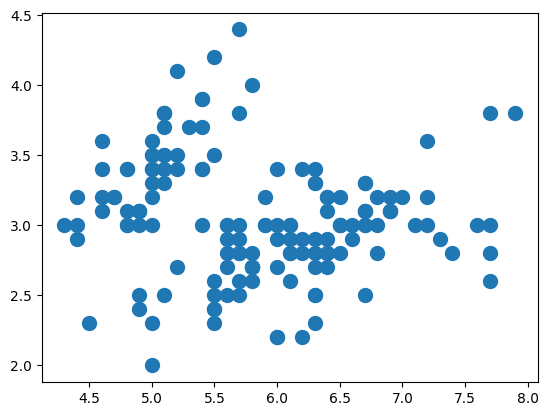

In [24]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)

plotting data X kolom pertama dan X kolom kedua

In [25]:
# Buat Model Kmeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

membuat model, fitting model sekaligus prediksi model KMeans

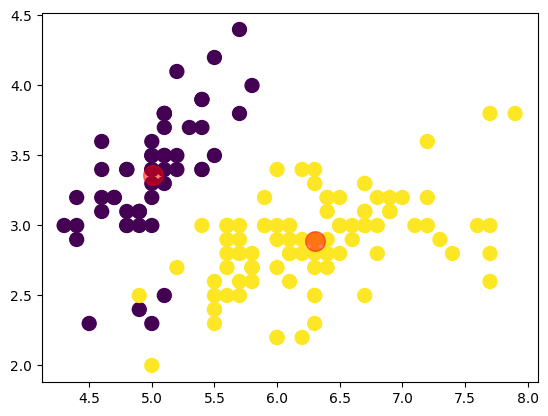

In [26]:
# Plot hasil cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='red', s=200, alpha=0.5)

plotting hasil prediksi dengan centroids

In [27]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


hasil SSE dari inertia cl_kmeans

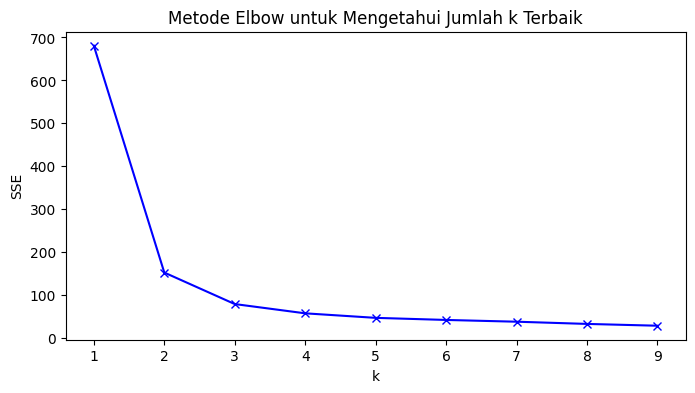

In [28]:
# Implementasi Metode Elbow

# List nilai SSE
sse=[]

# Cari k terbaik dari 1-10

K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

mencari jumlah K paling optimal

In [29]:
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244
k=2; SSE=152.36870647733906
k=3; SSE=78.94084142614602
k=4; SSE=57.34540931571816
k=5; SSE=46.80170193050193
k=6; SSE=41.929700724637684
k=7; SSE=37.819923371365476
k=8; SSE=32.67071512858699
k=9; SSE=28.473418083526788


nilai SSE setiap K

### **Praktikum 2 - Konsep K-Means untuk klasterisasi data**

#### **Import Library**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#### **Pengantar K-Means**

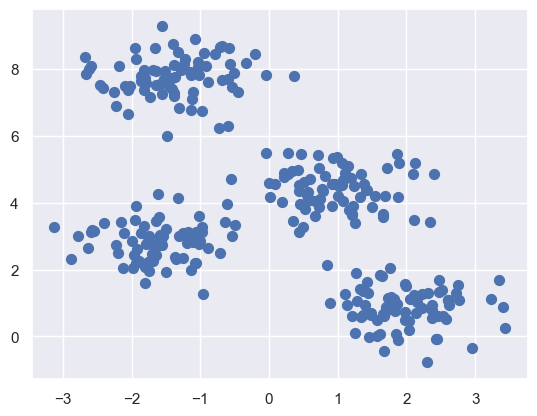

In [31]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

#### **Algoritma Expectation-Maximization**

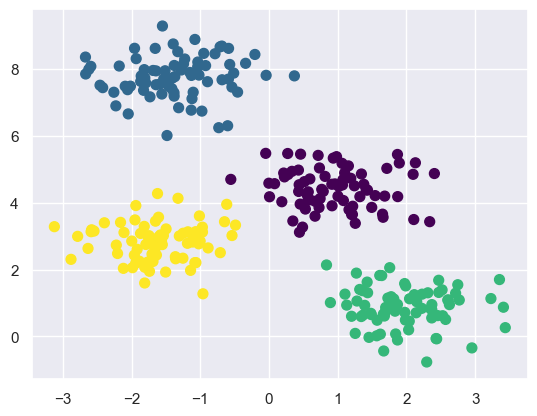

In [32]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Implementasi algoritma expectation-maximization untuk mencari cluster berdasarkan labels

#### **Perubahan random**

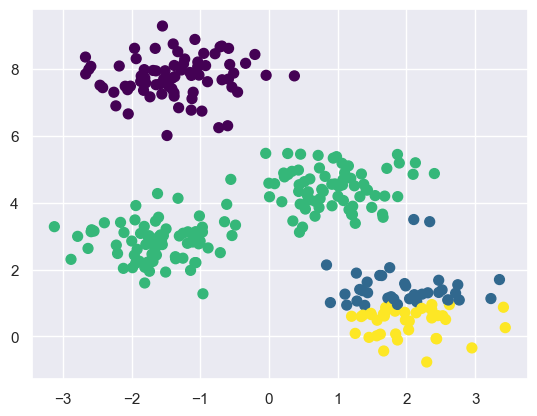

In [33]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

mencari cluster berdasarkan label dengan mengatur rseed menjadi 0 sehingga cluster yang ditampilkan random

#### **Optimalisasi Jumlah Klaster**

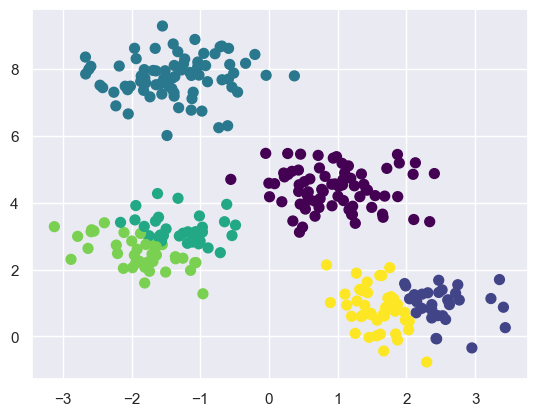

In [34]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

mengolah labels menggunakan KMeans

#### **Batas Klaster yang Tidak Selalu Linier**

In [35]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

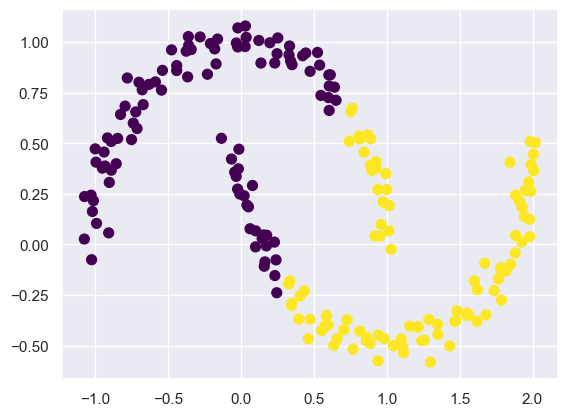

In [36]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

contoh data dengan cluster berbentuk bulan sabit

d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


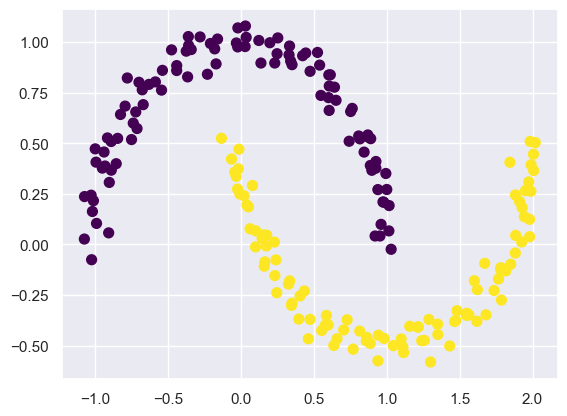

In [37]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

#### **Contoh Kasus 1: Karakter Angka**

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [39]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

membuat model, fitting model serta memprediksi menggunakan KMeans dari data gambar angka

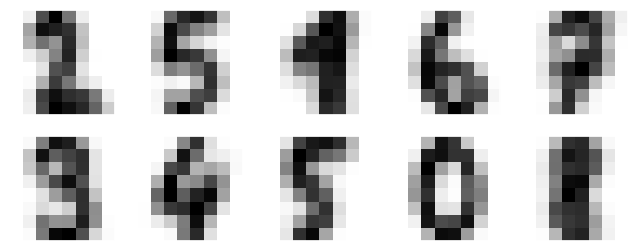

In [40]:
fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [41]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

digunakan untuk melabeli gambar

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

Text(110.44999999999997, 0.5, 'predicted label')

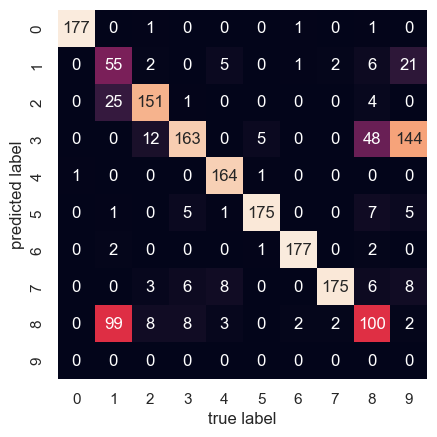

In [43]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [44]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
cluster = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(cluster)
for i in range(10):
    mask = (cluster == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

#### **Studi Kasus 2: Kompresi Citra**

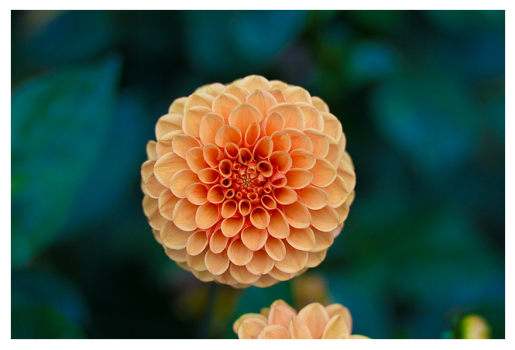

In [45]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [46]:
flower.shape

(427, 640, 3)

In [47]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [48]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

fungsi di atas digunakan untuk memvisualisasikan sebaran setiap channel warna pada gambar bunga

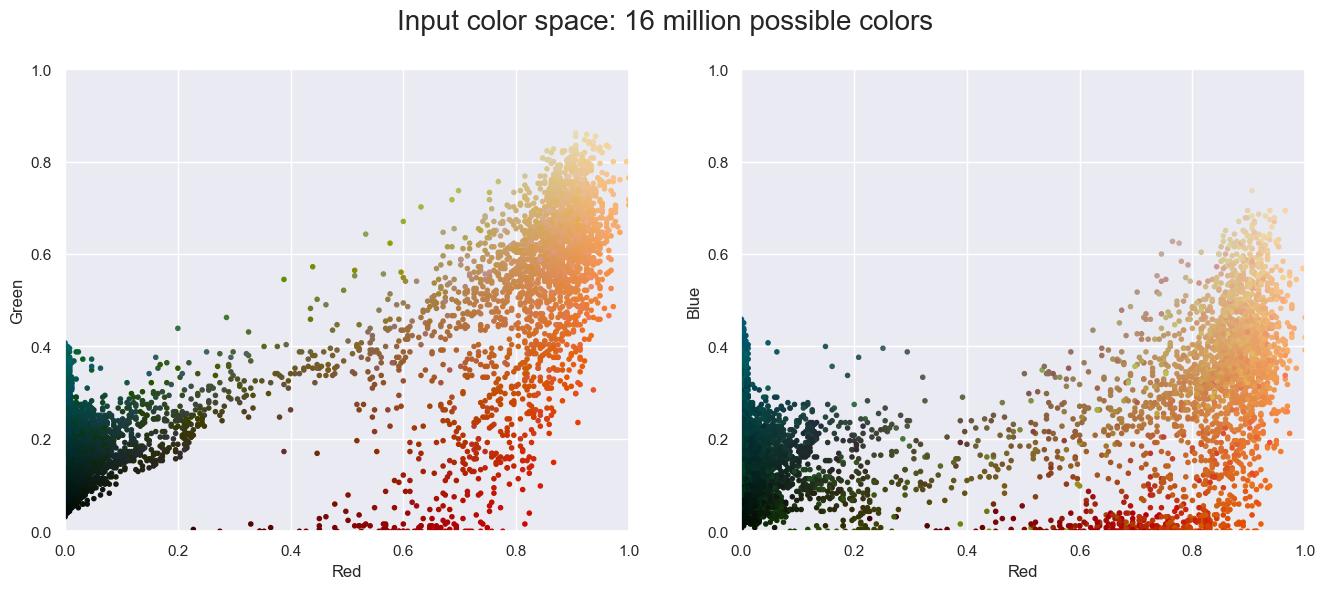

In [49]:
plot_pixels(data, title='Input color space: 16 million possible colors')

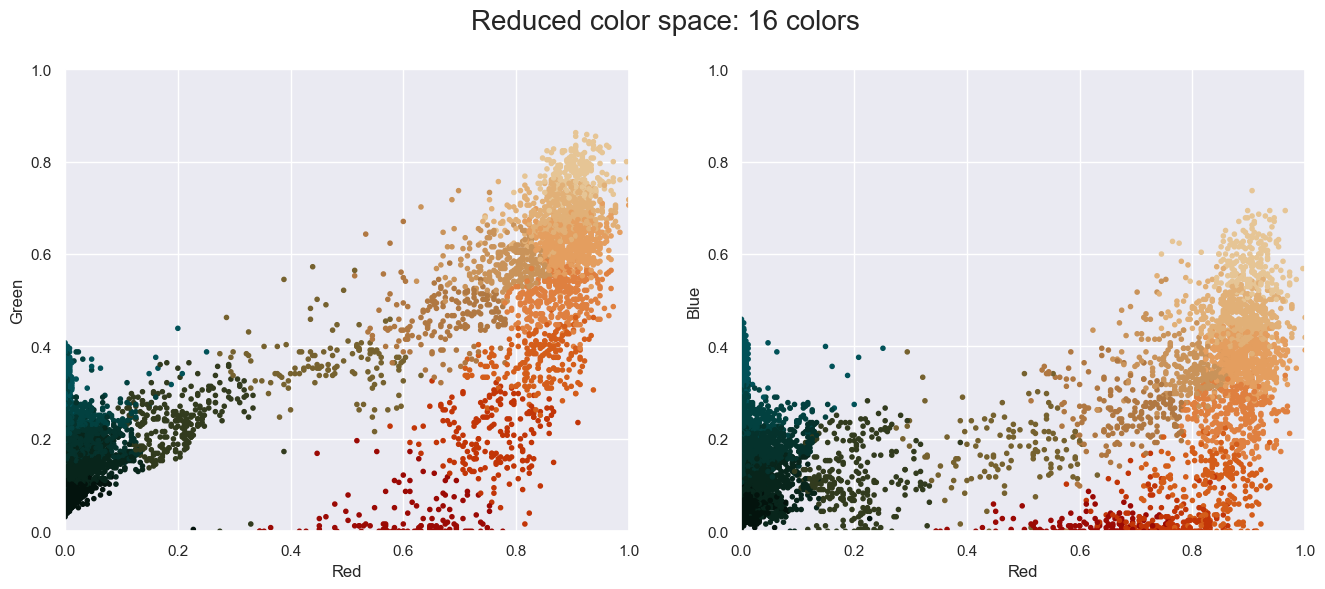

In [50]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

Text(0.5, 1.0, '16-color Image')

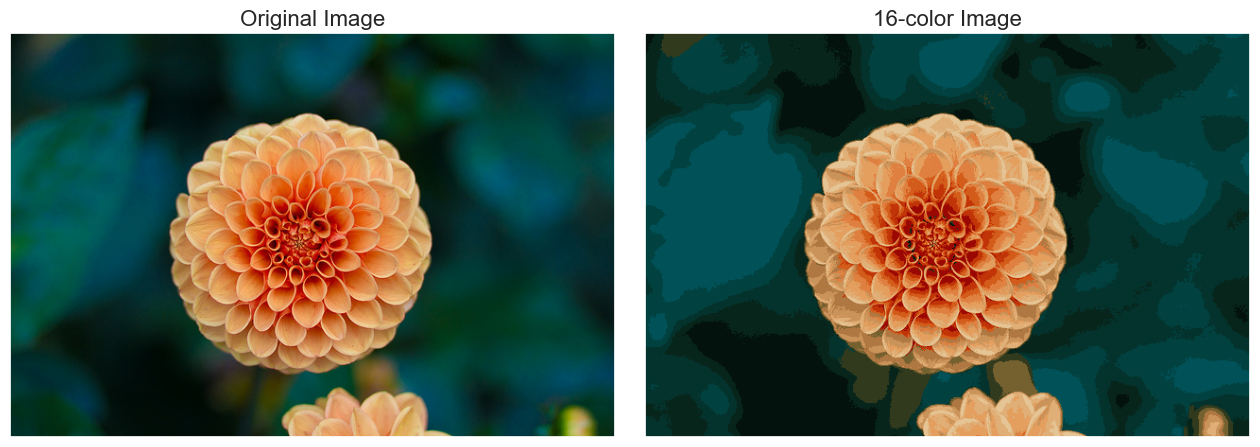

In [51]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16)

### **Praktikum 3 - Self-optimizing Map (SOM)**

In [53]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [54]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

In [55]:
data = data / data.max(axis=0)

In [56]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

In [57]:
# Normalisasi data
data = data / data.max(axis=0)

In [58]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

digunakan untuk menganalisa sebuah gambar menggunakan MiniSom dengan ukuran 10x10, dimana setiap neuron yang ada berfungsi untuk menampilkan cluster

In [59]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

pembobotan data secara acak

In [60]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

model dilatih sebanyak 100 kali perulangan

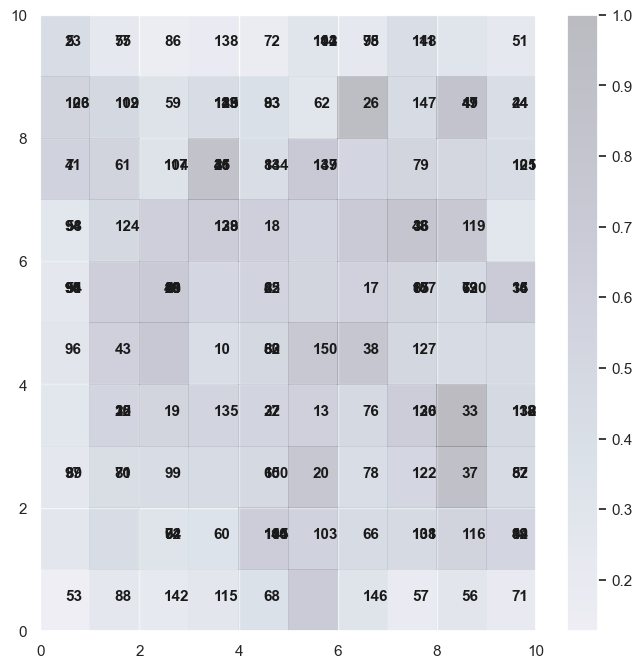

In [61]:
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

### **Praktikum 4 - Penerapan metode Self-Organizing Map (SOM) untuk segmentasi citra Lenna.**

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [63]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [64]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [65]:
# Fungsi untuk menemukan indeks unit pemenan (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [66]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [67]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Updae parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [68]:
# Load citra Lenna *Anda bisa mengganti ini dengan citra lain jika diperlukan
Lenna_path = "img/Lenna.png"
Lenna = io.imread(Lenna_path) / 255.0

In [69]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

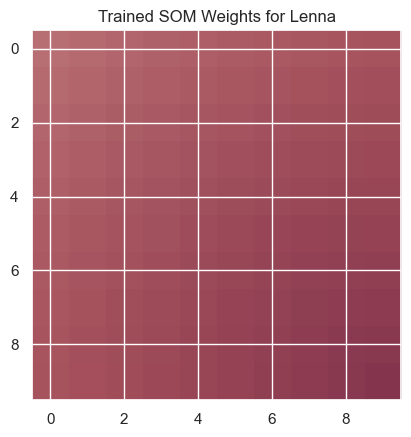

In [70]:
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lenna')
plt.show()

### **Tugas**

Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4. Buatlah implementasi model SOM untuk segmentasi citra lain

##### **Tugas No. 1 - 3**

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [72]:
df = pd.read_csv('datasets/Mall_Customers.csv')

df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [73]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


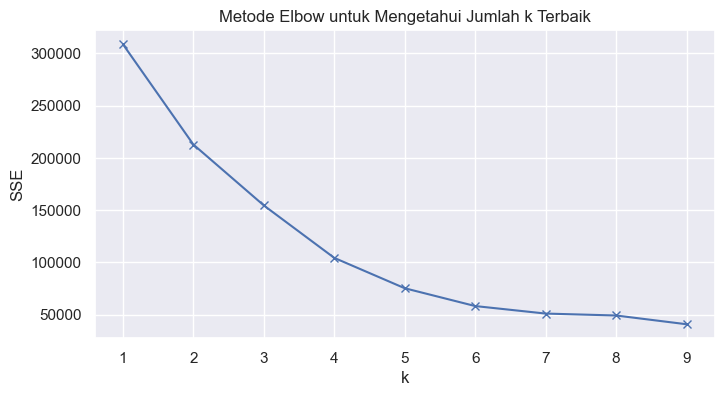

In [74]:
# List nilai SSE
sse = []
sil = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [75]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=308812.77999999997
k=2; SSE=212840.16982097185
k=3; SSE=154578.69843995018
k=4; SSE=104386.17701773129
k=5; SSE=75350.77917248776
k=6; SSE=58302.40630860368
k=7; SSE=51116.98694463431
k=8; SSE=49273.50392161602
k=9; SSE=40901.2569014319


In [76]:
cl_kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

df['Cluster'] = cl_kmeans.labels_

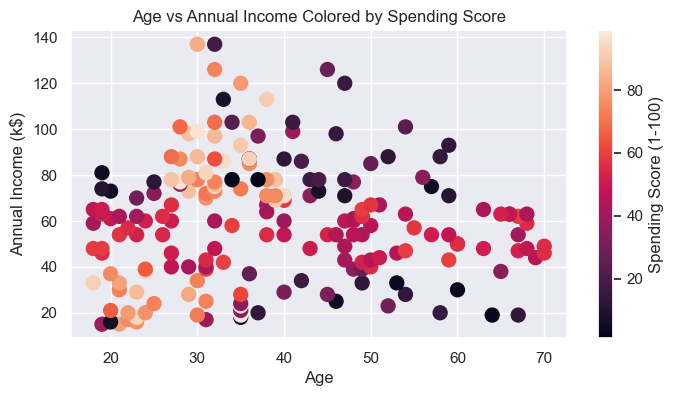

In [85]:
plt.figure(figsize=(8,4))
scatter = plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Spending Score (1-100)'], s=100)
plt.colorbar(scatter, label='Spending Score (1-100)')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income Colored by Spending Score')

plt.show()

In [87]:
print(f"Nilai SSE: {cl_kmeans.inertia_}")

Nilai SSE: 158744.97108013937


##### **Tugas No. 4**

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize

In [89]:
photo = io.imread('img/profile_picture.jpg') / 255.0

image_resized = resize(
    photo, (photo.shape[0] // 4, photo.shape[1] // 4), anti_aliasing=True
)

num_epochs = 75
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(image_resized, num_epochs, initial_learning_rate, initial_neighborhood_radius)

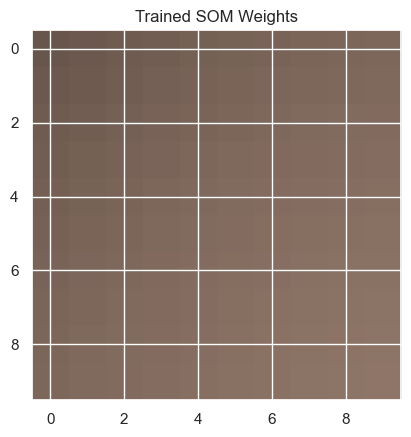

In [90]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights')
plt.show()